This tutorial is inspired by PyTorch Tutorials. The link to the source is <a href="https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html">here</a>. 

In this tutorial, we will be implementing a convolutional neural network which is able to classify images. The dataset used here is called MNIST consisting of handwritten digits.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

### 1. Load and Prepare the Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST('root=./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST('root=./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

Let's see some of the training samples and their labels:

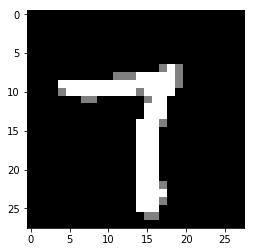

7


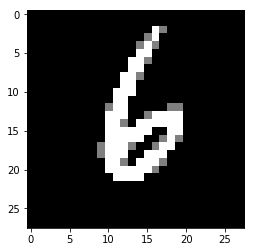

6


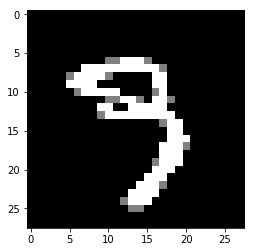

9


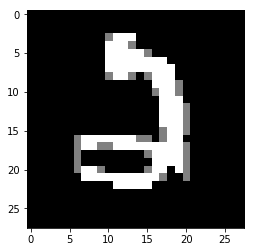

2


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

for i, data in enumerate(trainloader):
    imgs, labels = data
    plt.figure()
    two_d = (np.reshape(imgs[0].numpy(), (28, 28))).astype(np.uint8)
    plt.imshow(two_d, cmap='gray')
    plt.show()
    print(classes[labels[0]])
    if i >= 3:
        break

### 2. Define a Convolutional Neural Network

The network architecture is as follows:
<img src="images/MNIST.png">

First convolutional layer with 10 filters of size 5$*$5, stride 1 and padding 0 followed by a ReLU layer. First Maxpool layer with size and stride set to 2. Second convolutional layer with 20 fitlers of size 5$*$5, stride 1 and padding 0 followed by a ReLU layer. Second Maxpool layer is again with size and stride set to 2. Fully connected layer with 50 output neurons followed by a ReLU layer, and finally, fully connected layer with 10 output neurons.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5) # input channel = 3, number of filters = 10, size = 5*5
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc1 = nn.Linear(20*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        a1 = self.pool(F.relu(self.conv1(x)))
        a2 = self.pool(F.relu(self.conv2(a1)))
        a3 = a2.view(-1, 20*4*4)
        a4 = F.relu(self.fc1(a3))
        a5 = self.fc2(a4)
        return a5

Let's build a network and see how the layers of it look like:

In [13]:
net = Net()
net

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

### 3. Define a Loss Function and an Optimizer

In [14]:
import torch.optim as optim

learning_rate = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.5)

### 4. Train the Network

In [15]:
epochs = 10

for epoch in range(epochs):
    total_loss = 0
    for i, data in enumerate(trainloader, 0):
        samples, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        predictions = net(samples)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        
        # Print some statistics
        total_loss += loss
        if i % 5000 == 4999:
            print('epoch[%d], mini-batch[%5d] loss: %.3f' % (epoch+1, i+1, total_loss / 5000))
            total_loss = 0

print('Finished Training')

epoch[1], mini-batch[ 5000] loss: 0.240
epoch[1], mini-batch[10000] loss: 0.091
epoch[1], mini-batch[15000] loss: 0.077
epoch[2], mini-batch[ 5000] loss: 0.059
epoch[2], mini-batch[10000] loss: 0.060
epoch[2], mini-batch[15000] loss: 0.053
epoch[3], mini-batch[ 5000] loss: 0.041
epoch[3], mini-batch[10000] loss: 0.044
epoch[3], mini-batch[15000] loss: 0.044
epoch[4], mini-batch[ 5000] loss: 0.029
epoch[4], mini-batch[10000] loss: 0.036
epoch[4], mini-batch[15000] loss: 0.037
epoch[5], mini-batch[ 5000] loss: 0.027
epoch[5], mini-batch[10000] loss: 0.034
epoch[5], mini-batch[15000] loss: 0.037
epoch[6], mini-batch[ 5000] loss: 0.028
epoch[6], mini-batch[10000] loss: 0.028
epoch[6], mini-batch[15000] loss: 0.030
epoch[7], mini-batch[ 5000] loss: 0.022
epoch[7], mini-batch[10000] loss: 0.020
epoch[7], mini-batch[15000] loss: 0.027
epoch[8], mini-batch[ 5000] loss: 0.023
epoch[8], mini-batch[10000] loss: 0.020
epoch[8], mini-batch[15000] loss: 0.023
epoch[9], mini-batch[ 5000] loss: 0.016


### 5. Test the Trained Network on Test Data

Let's first look at the networks accuracy on the whole test set:

In [16]:
total = 0
corrects = 0

for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted_lables = torch.max(outputs.data, 1)
    total += labels.size(0)
    corrects += (predicted_lables == labels).sum().item()

print('Accuracy on %d test images is = %d %%' % (total, 100*corrects/total))

Accuracy on 10000 test images is = 98 %


Now, let's look at some samples and their predicted labels:

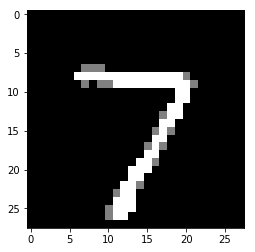

Predicted Label: [7]


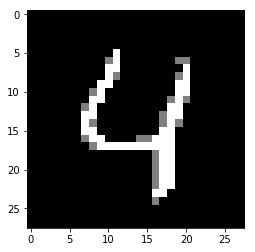

Predicted Label: [4]


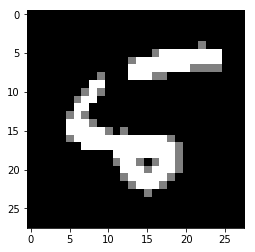

Predicted Label: [5]


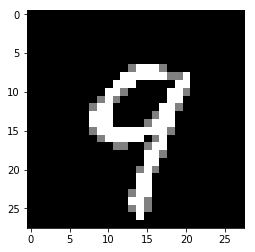

Predicted Label: [9]


In [43]:
for i, data in enumerate(testloader):
    imgs, labels = data
    plt.figure()
    two_d = (np.reshape(imgs[0].numpy(), (28, 28))).astype(np.uint8)
    plt.imshow(two_d, cmap='gray')
    plt.show()
    outputs = net(imgs)
    _, predicted_label = torch.topk(outputs[0], 1)
    print('Predicted Label:', predicted_label.numpy())
    if i >= 3:
        break